### Numerical integration of Schr&ouml;dinger equation

#### `picbIntegrate.py` is specifically for particle-in-a-complicatted-box, i.e., $U(x) = 0$ for 
$0<x<L$, and $U(x) = \text{constant}$ for $x>L$.

$$ -\frac{\hbar^2}{2m}\frac{d^2 \psi}{dx^2} + U(x) = E\psi  $$

Using the dimensionless length 
$$x^\prime \equiv x/L,$$ 
the Schr&ouml;dinger equation becomes

$$ -\frac{\hbar^2}{2mL^2}\frac{d^2 \psi}{{dx^\prime}^2} + U\psi = E\psi,  $$

or 

\begin{eqnarray}
\frac{d^2 \psi}{{dx^\prime}^2} &=& -\frac{2mL^2}{\hbar^2} (E-U)\psi \\
                               &=& -\frac{8mL^2\pi^2}{h^2} (E-U)\psi.
\end{eqnarray}
This suggests using dimensionless energies. I choose to use 

$$   
E^\prime \equiv E \frac{1}{h^2/(8mL^2)}\hspace{0.2in}\mbox{and}
                \hspace{0.2in}  U^\prime \equiv U \frac{1}{h^2/(8mL^2)}.   
$$

Notice that I didn't include the factor $\pi^2$ here; the choice is abitrary, but some things
come out neater this way.

In these units the Schroedinger equation is 

$$ \frac{d^2 \psi}{dx^2}  = -\left(E^\prime - U^\prime\right) \pi^2 \psi.  $$


The integration function uses a second order approximation for second derivative, in contrast to uncoupled first-order equations used in PHYS 211/212.


In these variables infinitie-square-well energies are $E_n = n^2$.
Particle in semi-infinite square well will have energies below 
these.  Energies for the `dx` used here are about $E_1 = 0.82699$, $E_2 = 3.27759$.

Originally developed for PHYS 212E, March 2016<br>
Modified for Jupyter notebook, Spring 2018<br>
Slight updates December 2020

Marty Ligare

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def u(x):            # Define potential energy function
    if x<1:
        return 0
    else:
        return 10 

def integrate(x):
    y = np.zeros(len(x))         # Initialize array for values of psi
    y[1] = dx                 # Fix value of y[1]
    for i in range(1,n-1):   # Update values of y[2], y[3], y[4], etc.
        y[i+1] = 2*y[i] - y[i-1] - dx**2*np.pi**2*(e-u(x[i]))*y[i]  
    return y  

#### Guess for value of `e` (energy)
Initial suggest guess of `e = 0.8` doesn't work; curvature too 
small.

Value of `e = 0.82699` gives good approximation for ground state.  (Lower than 
for particle in infinite square well.)

In [4]:
e = 0.82699

<IPython.core.display.Javascript object>


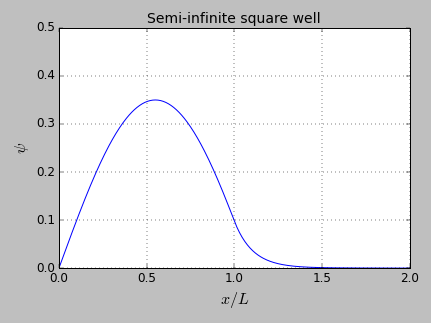

In [5]:
lep = 0                     # Left end-point 
rep = lep + 2               # Right end-point 
n = 401                    # Number of points (number of intervals = np-1) 
dx = (rep-lep)*1./(n-1)    # Distance between points

x = np.linspace(lep, rep, n)  # Select x-values 
y = integrate(x)            # Calcuate values of the wavefunction

plt.plot(x,y)
plt.xlabel('$x/L$')    # Label for horizontal axis
plt.ylabel("$\psi$")    # Label for vertical axis
plt.title("Semi-infinite square well")
plt.ylim(0,0.5)
plt.grid(True);


# plt.savefig("test.png")

#### Version information

+ `%version_information` is an IPython magic extension for showing version information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. You can easily install it on any computer.


In [6]:
%load_ext version_information

In [7]:
version_information numpy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
matplotlib 3.2.2
Mon Dec 21 11:06:20 2020 EST